In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score

In [2]:
# Read the data into a dataframe
df = pd.read_csv("csgo_round_snapshots.csv")
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [3]:
# Check for null columns
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

C:\Users\truon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='round_winner', ylabel='count'>

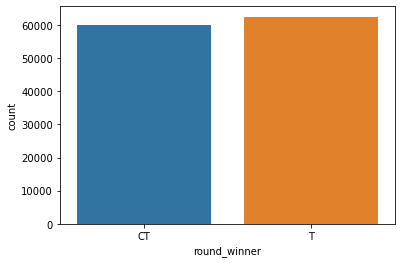

In [4]:
# Plot round winners by sides
sns.countplot(df['round_winner'])

In [5]:
col = df.columns
print(col)

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [6]:
# Remove columns with only 1 value
val_count = []
for i in col:
    val_count.append(df[i].nunique())

removed = []

for i in range(len(val_count)):
    if val_count[i] == 1:
        removed.append(col[i])
        df.drop(col[i], axis = 1, inplace = True)


In [7]:
# New df with less columns
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [8]:
# Removed columns
removed

['ct_weapon_bizon',
 'ct_weapon_g3sg1',
 't_weapon_m249',
 'ct_weapon_negev',
 'ct_weapon_r8revolver',
 'ct_weapon_sawedoff']

In [9]:
# View value counts in columns
val_count

[10782,
 33,
 34,
 8,
 2,
 501,
 502,
 415,
 477,
 1360,
 1399,
 6,
 6,
 6,
 6,
 7,
 5,
 6,
 6,
 4,
 6,
 5,
 1,
 2,
 6,
 7,
 2,
 2,
 6,
 3,
 1,
 5,
 3,
 6,
 4,
 10,
 2,
 1,
 4,
 3,
 6,
 4,
 4,
 6,
 3,
 2,
 2,
 3,
 3,
 3,
 6,
 4,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 5,
 6,
 5,
 4,
 4,
 4,
 3,
 2,
 6,
 6,
 6,
 3,
 11,
 6,
 6,
 6,
 4,
 4,
 3,
 5,
 6,
 6,
 8,
 7,
 7,
 7,
 6,
 4,
 4,
 6,
 4,
 3,
 2]

In [10]:
# Label encoding categorical values
le = preprocessing.LabelEncoder()
df["map"] = le.fit_transform(df["map"])
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])
df['round_winner'] = le.fit_transform(df['round_winner'])
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [11]:
# Classifier with only 11 first features
X_11 = df[["time_left","ct_score","t_score","bomb_planted","map","ct_health","t_health","ct_armor",
                       "t_armor","ct_money","t_money"]]
X_11.head()

,time_left,ct_score,t_score,bomb_planted,map,ct_health,t_health,ct_armor,t_armor,ct_money,t_money
0,175.00,0.0,0.0,0,1,500.0,500.0,0.0,0.0,4000.0,4000.0
1,156.03,0.0,0.0,0,1,500.0,500.0,400.0,300.0,600.0,650.0
2,96.03,0.0,0.0,0,1,391.0,400.0,294.0,200.0,750.0,500.0
3,76.03,0.0,0.0,0,1,391.0,400.0,294.0,200.0,750.0,500.0
4,174.97,1.0,0.0,0,1,500.0,500.0,192.0,0.0,18350.0,10750.0


In [12]:
y = df["round_winner"]
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int32

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_11, y, test_size = 0.33, random_state = 200)
X_train

,time_left,ct_score,t_score,bomb_planted,map,ct_health,t_health,ct_armor,t_armor,ct_money,t_money
51726,66.81,6.0,3.0,0,6,500.0,400.0,480.0,371.0,4850.0,6750.0
103953,94.92,15.0,8.0,0,1,445.0,496.0,468.0,500.0,27700.0,1550.0
73657,89.95,1.0,4.0,0,5,500.0,500.0,499.0,472.0,2600.0,3450.0
104911,94.90,2.0,12.0,0,7,400.0,334.0,400.0,369.0,450.0,31350.0
117717,54.95,5.0,2.0,0,2,400.0,369.0,366.0,400.0,32050.0,2100.0
...,...,...,...,...,...,...,...,...,...,...,...
107340,174.95,14.0,12.0,0,1,500.0,500.0,200.0,0.0,19350.0,19100.0
46775,54.95,3.0,2.0,0,2,379.0,281.0,297.0,323.0,3500.0,5250.0
66320,174.94,6.0,5.0,0,7,500.0,500.0,369.0,0.0,34100.0,21850.0
12905,175.00,5.0,10.0,0,3,500.0,500.0,0.0,0.0,4000.0,4000.0


In [14]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     19850
           1       0.86      0.84      0.85     20546

    accuracy                           0.85     40396
   macro avg       0.85      0.85      0.85     40396
weighted avg       0.85      0.85      0.85     40396



In [15]:
# Classifier with all features
X = df.drop('round_winner', axis = 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 200)
X_train

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
51726,66.81,6.0,3.0,6,0,500.0,400.0,480.0,371.0,4850.0,...,5.0,3.0,3.0,4.0,2.0,0.0,0.0,4.0,0.0,0.0
103953,94.92,15.0,8.0,1,0,445.0,496.0,468.0,500.0,27700.0,...,4.0,5.0,3.0,5.0,1.0,0.0,0.0,3.0,0.0,0.0
73657,89.95,1.0,4.0,5,0,500.0,500.0,499.0,472.0,2600.0,...,3.0,5.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0
104911,94.90,2.0,12.0,7,0,400.0,334.0,400.0,369.0,450.0,...,1.0,2.0,2.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0
117717,54.95,5.0,2.0,2,0,400.0,369.0,366.0,400.0,32050.0,...,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107340,174.95,14.0,12.0,1,0,500.0,500.0,200.0,0.0,19350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46775,54.95,3.0,2.0,2,0,379.0,281.0,297.0,323.0,3500.0,...,2.0,2.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0
66320,174.94,6.0,5.0,7,0,500.0,500.0,369.0,0.0,34100.0,...,3.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
12905,175.00,5.0,10.0,3,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     19850
           1       0.88      0.86      0.87     20546

    accuracy                           0.87     40396
   macro avg       0.87      0.87      0.87     40396
weighted avg       0.87      0.87      0.87     40396

